#### Author: Alen Pavlovic
The University of Chicago, MasterTrack Certificate - Machine Learning for Analytics

In [1]:
import numpy as np
import pandas as pd
import scipy.stats

from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Executive Summary
Executive Summary - 10 points: briefly introduce the motivation, data, methods, and results. Be concise.

Proper housing valuation is essential for the community as it is the benchmark used for the Property Tax. I aimed to create a model for predicting single-family homes using the techniques learned in the first course of the MasterTrack certificate. A series of four models are created using original and created features, and the models are different in complexity from bivariate to multivariate linear regressions. A multivariate linear regression model was the best-performing model.

## Introduction (Motivation)
Introduction (Motivation) - 10 points: the purpose of this project. Feel free to use the context we provided.

The Cook County Assessor's Office (CCAO) is interested in better understanding data relating to valuation of single family homes using machine learning and statistics at our disposal. The sample dataset consist
of random sample of homes that have sold in the three regions of Cook County (Northern Townships, City of Chicago, Southwest Townships) during tax years 2003-2018.

## Dataset Description

- `PIN` : Unique Permanent Identification Number for each property. All PINs are 14 digits: 2 digits for area + 2 digits for sub area + 2 digits for block + 2 digits for parcel + 4 digits for the multicode

- `Property Address` : Property street address, not the address of the taxpayer.

- `Tax Year` : Tax year of sale. Tax year referrs to the year in which taxes due. Taxes are billed a year in arrears. If a sale ocurred in calendar year 2018, it will be in tax year 2019.

- `Property Class` : Property class. For a list of property classes,see  https://www.cookcountyassessor.com/assets/forms/classcode.pdf

- `Census Tract` : Census tract identifier - full map available through the Census Bureau, https://www.census.gov/geo/maps-data/maps/2010ref/st17_tract.html
- `Type of Residence` :
    - Type of residence - 1 = one story, 2 = two-story, 3 = three-story or higher, 4 = split level, 5 = 1.5 story, 6 = 1.6 story, 7 = 1.7 story , 8 = 1.8 story , 9 = 1.9 story
        - (Note: residences with 1.5 - 1.9 stories are one story and have partial livable attics and are classified based on the square footage of the attic compared to the first floor of the house. So, 1.5 story houses have an attic that is 50% of the area of the first floor, 1.6 story houses are 60%, 1.7 are 70%, etc. However, what is recorded on the field card differs from what is in the database. All 1.5 - 1.9 story houses are coded as 5)

- `Rooms` :	Number of rooms in the property (excluding baths). Not to be confused with bedrooms.

- `Bedrooms` :	Number of bedrooms in the property, defined based on building squarefoot and the judgement of the person in the field.

- `Basement` :	Basement type - 1 = Full, 2 = Slab, 3 = Partial, 4 = Crawl

- `Fireplaces` :	Number of fireplaces, counted as the number of flues one can see from the outside of the building.

- `Central Air` : Is central airconditioning present? - 1 = yes, 2 = no

- `Full Baths` : Number of full bathrooms, defined as having a bath or shower. If this value is missing, the default value is set to 1.

- `Half Baths` :	Number of half baths, defined as bathrooms without a shower or bathtub.

- `Building Square Feet` :	Building square feet, as measured from the exterior of the property

- `Land Square Feet` : Square feet of the land (not just the building) of the property. Note that land is divided into 'plots' and 'parcels' - this field applies to parcels, identified by PIN

- `Age` :	Age of the property. If missing, this defaults to 10. This field is a combination of original age and effective age where original age refers to the oldest component of the building and effective age is a relative judgement due to renovations or other improvements. For instance, if a property is completely demolished and built up again, the age resets to 1. But if portions of the original structure are kept, it may be more complicated to determine the age.

- `Longitude` :	Longitude coordinate of the property's location, as defined by the centroid of the parcel shape in GIS.

- `Latitude` : Latitude coordinate of the property's location, as defined by the centroid of the parcel shape in GIS.

- `Walkscore` : Walkability score on a 100 point scale, using property distance to amenities. https://www.walkscore.com/methodology.shtml

- `Walkfac` : Walkscores transferred into a 4 level category variable ranging from 'car-dependent' to 'walker󿿕s paradise'.  https://www.walkscore.com/methodology.shtm

- `Sale Price` :	Sale price

In [2]:
#load the data
df = pd.read_csv("/home/lu531084/Downloads/project1_raw_data.csv")
df.head(5)

,PIN,Property_Address,Tax_Year,Property_Class,Census_Tract,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,...,Full_Baths,Half_Baths,Building_Square_Feet,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price
0,8124170000000,613 S SCHOOL ST MOUNT PROSPECT,2018,203,804901.0,1.0,6.0,4.0,1.0,1.0,...,1.0,1.0,1461.0,8712.0,60.0,-87.930691,42.054184,49.0,Car-Dependent,298000
1,13113220261025,7101 N CICERO STE 100,2003,299,140301.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-87.747614,42.010341,48.0,Car-Dependent,171000
2,6352050000000,602 MAPLE DR STREAMWOOD,2018,278,804509.0,2.0,8.0,4.0,3.0,0.0,...,2.0,1.0,2224.0,8316.0,19.0,-88.168322,42.002096,15.0,Car-Dependent,255000
3,27174070330000,10626 DANI LN,2014,295,824114.0,2-story,5.0,3.0,Partial basement,1.0,...,2.0,1.0,1817.0,1399.0,7.0,-87.878278,41.604719,29.0,Car-Dependent,254900
4,14312140120000,1507 SUNSET RIDGE RD,2003,211,832300.0,3-story,18.0,6.0,Full basement,0.0,...,6.0,0.0,4604.0,3000.0,122.0,-87.789610,42.124919,11.0,Car-Dependent,715000


We can make a couple of observations from the first few rows of the sample dataset. The data needs to be cleaner; we have NaN values in the dataset and need to address them. There is a mix of numerical, categorical, and string variables.

In [3]:
df.describe()

,PIN,Tax_Year,Property_Class,Census_Tract,Rooms,Bedrooms,Fireplaces,Full_Baths,Half_Baths,Building_Square_Feet,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Sale_Price
count,2.000000e+04,20000.000000,20000.000000,19931.000000,14150.000000,14150.000000,14150.000000,16395.000000,14150.000000,14150.000000,1.639500e+04,16395.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,1.471050e+13,2011.532450,243.505950,634232.609001,6.948622,3.479929,0.368198,1.566514,0.479859,1794.277527,6.542836e+04,52.560659,-87.800152,41.900020,59.210250,3.045588e+05
std,7.559693e+12,5.862428,43.673876,287625.893191,3.071205,1.393314,0.636471,0.844079,0.563312,1020.209314,2.607345e+05,32.536979,0.157716,0.160789,24.589251,2.984240e+05
min,1.011000e+12,2003.000000,200.000000,10100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.810000e+02,1.000000,-88.249985,41.470024,0.000000,1.000000e+00
25%,9.174138e+12,2006.000000,203.000000,490800.000000,5.000000,3.000000,0.000000,1.000000,0.000000,1132.000000,3.780000e+03,25.000000,-87.869633,41.795423,42.000000,1.525000e+05
50%,1.418422e+13,2012.000000,211.000000,804603.000000,6.000000,3.000000,0.000000,1.000000,0.000000,1465.500000,6.388000e+03,52.000000,-87.769323,41.931044,62.000000,2.320000e+05
75%,1.911229e+13,2018.000000,299.000000,815900.000000,8.000000,4.000000,1.000000,2.000000,1.000000,2166.750000,1.012550e+04,76.000000,-87.681522,42.027164,79.000000,3.550000e+05
max,3.331207e+13,2018.000000,299.000000,843900.000000,80.000000,24.000000,9.000000,10.000000,6.000000,12377.000000,2.831778e+06,163.000000,-87.525559,42.158896,100.000000,5.300000e+06


Running the basic descriptive statistics on our data set to get a feeling of the data. In the next chapter, we will go through each of the columns individually and look deeper into basic statistical measurements.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PIN                   20000 non-null  int64  
 1   Property_Address      20000 non-null  object 
 2   Tax_Year              20000 non-null  int64  
 3   Property_Class        20000 non-null  int64  
 4   Census_Tract          19931 non-null  float64
 5   Type_of_Residence     14150 non-null  object 
 6   Rooms                 14150 non-null  float64
 7   Bedrooms              14150 non-null  float64
 8   Basement              14150 non-null  object 
 9   Fireplaces            14150 non-null  float64
 10  Central_Air           14150 non-null  object 
 11  Full_Baths            16395 non-null  float64
 12  Half_Baths            14150 non-null  float64
 13  Building_Square_Feet  14150 non-null  float64
 14  Land_Square_Feet      16395 non-null  float64
 15  Age                

The dataset consists of 20,000 rows with 21 columns. The pandas info indicates that there is a decent amount of null values in the dataset.

In [5]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Central_Air,5850,0.29250
Type_of_Residence,5850,0.29250
Rooms,5850,0.29250
Bedrooms,5850,0.29250
Basement,5850,0.29250
Fireplaces,5850,0.29250
Half_Baths,5850,0.29250
Building_Square_Feet,5850,0.29250
Full_Baths,3605,0.18025
Land_Square_Feet,3605,0.18025


5850 data rows across different columns are missing data, corresponding to almost 30% of the dataset. The data-cleaning part of the analysis will play a crucial role.

## Data Cleaning

Data Cleaning - 10 points: address issues like data type conversion, fixed structure for text data, missing values, and outliers.

#### PIN

In [6]:
df['PIN'] = df['PIN'].astype(str)
df['PIN'].str.len().value_counts(ascending = True)

13     5588
14    14412
Name: PIN, dtype: int64

`PIN` should be a 14 digit number,  2 digits for area + 2 digits for sub area + 2 digits for block + 2 digits for parcel + 4 digits for the multicode.

In [7]:
df['PIN'] = df['PIN'].str.pad(width = 14, side = 'left' , fillchar = '0')
df['Area_Code'] = df['PIN'].str[:2].astype('category')
df['Sub_Area_Code'] = df['PIN'].str[2:4].astype('category')
df['Block'] = df['PIN'].str[4:6].astype('category')

`PIN`s of 13 digits will be padded on the left with the leading zero. From the `PIN`, we can generate new features - `Area_Code`, `Sub_Area_Code`, and `Block`.

#### Property_Address & Census_Tract

In [8]:
to_drop = ['Property_Address' , 'Census_Tract']
df.drop(labels = to_drop, axis = 1, inplace = True)
df.head(5)

,PIN,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,...,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price,Area_Code,Sub_Area_Code,Block
0,08124170000000,2018,203,1.0,6.0,4.0,1.0,1.0,1.0,1.0,...,8712.0,60.0,-87.930691,42.054184,49.0,Car-Dependent,298000,08,12,41
1,13113220261025,2003,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-87.747614,42.010341,48.0,Car-Dependent,171000,13,11,32
2,06352050000000,2018,278,2.0,8.0,4.0,3.0,0.0,1.0,2.0,...,8316.0,19.0,-88.168322,42.002096,15.0,Car-Dependent,255000,06,35,20
3,27174070330000,2014,295,2-story,5.0,3.0,Partial basement,1.0,Yes,2.0,...,1399.0,7.0,-87.878278,41.604719,29.0,Car-Dependent,254900,27,17,40
4,14312140120000,2003,211,3-story,18.0,6.0,Full basement,0.0,No,6.0,...,3000.0,122.0,-87.789610,42.124919,11.0,Car-Dependent,715000,14,31,21


`Property_Address` and `Census_Tract` are the two-column that we will drop, and both columns serve as a location identifier. Considering that we will only focus on the linear relationship between the sale price and independent variable, we can remove the `Property_Address` and `Census_Tract` from our analysis.

#### Tax_Year

In [9]:
df['Tax_Year'] = df['Tax_Year'].astype('category')
df.value_counts(subset = 'Tax_Year', dropna = False , ascending = True)

Tax_Year
2009     557
2011     563
2012     573
2010     612
2008     613
2014     747
2013     763
2015     777
2007     961
2006    1418
2003    1624
2004    1653
2005    1670
2018    7469
dtype: int64

We can transform `Tax_Year` to a categorical variable, also note that data for 2016 and 2017 are missing.

#### Property_Class

In [10]:
df.value_counts(subset = 'Property_Class' , dropna = False , ascending = True)

Property_Class
200       1
288       1
290       2
239       2
297      18
201      22
241      29
210      93
209     105
212     112
208     205
206     418
207     564
204     615
205     730
295    1097
234    1196
278    1307
202    1587
211    1715
203    4452
299    5729
dtype: int64

In [11]:
single_family_homes = list(range(202 , 210)) + [234 , 278] ### https://www.chicagocityscape.com/guides/propertyclasses.php -> single-unit: detached
df = df[df['Property_Class'].isin(values = single_family_homes)]
df['Property_Class'] = df['Property_Class'].astype('category')

The `Property_Class` is filtered to single-family houses using the data from the Chicagocityscape.

#### Type_of_Residence

In [12]:
df['Type_of_Residence'].value_counts(dropna = False)
####  1 = one story, 2 = two-story, 3 = three-story or higher, 4 = split level, 5 = 1.5 story, 6 = 1.6 story, 7 = 1.7 story , 8 = 1.8 story , 9 = 1.9 story

1-story       3563
1.0           1824
2.0           1669
2-story       1549
?              881
multilevel     701
4.0            514
5.0            373
NaN             61
3-story         40
3.0              3
0                1
Name: Type_of_Residence, dtype: int64

In [13]:
df[df['Type_of_Residence'] == '3.0']

,PIN,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,...,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price,Area_Code,Sub_Area_Code,Block
684,11194100000000,2018,206,3.0,5.0,2.0,1.0,1.0,1.0,2.0,...,7695.0,108.0,-87.675894,42.030525,79.0,Very Walkable,1123000,11,19,41
6987,05354070000000,2018,209,3.0,9.0,5.0,1.0,1.0,1.0,5.0,...,6150.0,92.0,-87.679075,42.066510,52.0,Somewhat Walkable,1160000,05,35,40
15134,05081010000000,2018,209,3.0,13.0,5.0,3.0,4.0,1.0,6.0,...,21750.0,9.0,-87.746461,42.132282,27.0,Car-Dependent,3600000,05,08,10


In [14]:
df[df['Type_of_Residence'] == '0'] # drop because it is not building, just land

,PIN,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,...,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price,Area_Code,Sub_Area_Code,Block
6851,16293220500000,2003,202,0,0.0,0.0,0,0.0,0,0.0,...,4725.0,79.0,-87.629798,41.878114,99.0,Walker's Paradise,150000,16,29,32


In [15]:
df[df['Type_of_Residence'].isna()].head(5) # drop NaN because a lot of data is missing

,PIN,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,...,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price,Area_Code,Sub_Area_Code,Block
78,09362060120000,2006,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-87.809969,42.010519,66.0,Somewhat Walkable,365905,09,36,20
218,09254070050000,2012,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-87.807511,42.017627,76.0,Very Walkable,199000,09,25,40
385,01222050000000,2018,209,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,55870.0,10.0,-88.166719,42.104397,2.0,Car-Dependent,400000,01,22,20
405,09254060250000,2005,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-87.808087,42.018411,78.0,Very Walkable,322000,09,25,40
410,01214030000000,2018,278,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,22270.0,10.0,-88.184213,42.098823,4.0,Car-Dependent,849225,01,21,40


In [16]:
df = df[~((df['Type_of_Residence'].isna()) | (df['Type_of_Residence'] == '0'))] ### exclude nan and 0

In [17]:
df[df['Type_of_Residence'] == '?'] ## we will keep them.

,PIN,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,...,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price,Area_Code,Sub_Area_Code,Block
8,13323100050000,2015,203,?,6.0,3.0,Full basement,0.0,No,1.0,...,3937.0,90.0,-87.781041,41.912331,73.0,Very Walkable,285000,13,32,31
12,15343180050000,2003,202,?,5.0,3.0,Full basement,0.0,Yes,1.0,...,7500.0,62.0,-87.858409,41.823086,50.0,Car-Dependent,212500,15,34,31
35,25124160710000,2009,204,?,8.0,4.0,Partial basement,0.0,No,2.0,...,5208.0,71.0,-87.567219,41.710818,40.0,Car-Dependent,152000,25,12,41
44,13251140200000,2006,202,?,5.0,3.0,Full basement,0.0,No,1.0,...,3150.0,124.0,-87.705398,41.936155,87.0,Very Walkable,315000,13,25,11
85,13294130290000,2004,203,?,6.0,3.0,Full basement,0.0,No,1.0,...,3720.0,88.0,-87.768848,41.928609,77.0,Very Walkable,275000,13,29,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,16314100230000,2003,203,?,6.0,3.0,crawlspace,0.0,No,1.0,...,3690.0,82.0,-87.787996,41.826181,62.0,Somewhat Walkable,245000,16,31,41
19882,28232130170000,2003,203,?,7.0,4.0,Slab basement,1.0,No,1.0,...,5320.0,64.0,-87.697342,41.598531,68.0,Somewhat Walkable,85000,28,23,21
19919,26171280540000,2006,203,?,4.0,2.0,Full basement,0.0,Yes,1.0,...,4235.0,58.0,-87.534954,41.696584,68.0,Somewhat Walkable,182000,26,17,12
19947,19142240060000,2005,203,?,4.0,2.0,Full basement,1.0,Yes,1.0,...,3150.0,81.0,-87.709199,41.787449,73.0,Very Walkable,215000,19,14,22


In [18]:
type_of_residence_mapping = {
    '1.0': "1-story",
    '2.0': "2-story",
    '3.0': "multilevel",
    '4.0': "2-story",
    '5.0': "1.x-story",
    '3-story': "multilevel",
    '?': "unknown"
}

df['Type_of_Residence'] = df['Type_of_Residence'].replace(type_of_residence_mapping).astype('category')

`Type_of_Residence` has a different mappings across same "story" (.e.g 1-story and 1.0).

`Type_of_Residence` has a lot of NaN values, and we will use this opportunity to clean them from our dataset.

Upon observing `Type_of_Residence` = 0, we can tell that the data entry is either incorrectly entered or not a single-family home.

### Rooms

In [19]:
df.value_counts(subset = 'Rooms' , dropna = False)

Rooms
6.0     3119
5.0     2768
7.0     1766
8.0     1325
4.0      985
9.0      632
10.0     256
12.0      78
11.0      72
3.0       70
14.0      17
13.0      15
15.0       4
16.0       4
18.0       2
17.0       1
23.0       1
28.0       1
80.0       1
dtype: int64

In [20]:
df[df['Rooms'].isin([23 , 28 , 80])] ### drop 80 rooms

,PIN,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,...,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price,Area_Code,Sub_Area_Code,Block
6347,14331100160000,2009,209,multilevel,23.0,12.0,Full basement,0.0,No,3.0,...,2975.0,115.0,-87.644889,41.923463,95.0,Walker's Paradise,2250000,14,33,11
6600,14191280370000,2015,278,2-story,28.0,12.0,Partial basement,0.0,No,4.0,...,4960.0,96.0,-87.683276,41.948472,77.0,Very Walkable,2319000,14,19,12
15837,33071020070000,2010,234,multilevel,80.0,3.0,Partial basement,0.0,No,1.0,...,10363.0,13.0,-87.553839,41.537929,24.0,Car-Dependent,98000,33,07,10


In [21]:
df = df[df['Rooms'] != 80]

We will remove the outlier where the number of rooms is 80, but the number of bedrooms is only 3, and the property is only 1,264 square feet.

### Bedrooms

In [22]:
df.value_counts(subset = 'Bedrooms' , dropna = False)

Bedrooms
3.0     5784
4.0     2860
2.0     1751
5.0      553
6.0      133
1.0       19
7.0       10
9.0        3
12.0       2
8.0        1
dtype: int64

In [23]:
df[df['Bedrooms'].isin([8 , 12])] ### drop because rooms is higher than bedrooms

,PIN,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,...,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price,Area_Code,Sub_Area_Code,Block
6347,14331100160000,2009,209,multilevel,23.0,12.0,Full basement,0.0,No,3.0,...,2975.0,115.0,-87.644889,41.923463,95.0,Walker's Paradise,2250000,14,33,11
6600,14191280370000,2015,278,2-story,28.0,12.0,Partial basement,0.0,No,4.0,...,4960.0,96.0,-87.683276,41.948472,77.0,Very Walkable,2319000,14,19,12
14689,29082170330000,2003,278,2-story,16.0,8.0,Slab basement,0.0,No,4.0,...,6250.0,36.0,-87.640540,41.625315,48.0,Car-Dependent,159900,29,08,21


The `Bedroom` column looks in order, and no additional work is needed.

### Basement

In [24]:
df.value_counts(subset = 'Basement' , dropna = False)

Basement
Full basement       4247
1.0                 2196
3.0                 1376
Partial basement    1297
Slab basement        843
2.0                  436
4.0                  375
crawlspace           346
dtype: int64

In [25]:
basement_mapping = {"Full basement" : "Full" ,
                    "Slab basement" : "Slab" ,
                    "crawlspace" : "Crawl",
                    "Partial basement" : "Partial",
                    "0.0" : "None",
                    "1.0" : "Full",
                    "2.0" : "Slab",
                    "3.0" : "Partial",
                    "4.0" : "Crawl"}

df['Basement'] = df['Basement'].map(basement_mapping).astype('category')

The `Basement` column is converted to a categorial type with uniform mapping across the dataset

### Fireplaces

In [26]:
df.value_counts(subset = 'Fireplaces' , dropna = False)

Fireplaces
0.0    7423
1.0    3101
2.0     471
3.0      84
4.0      28
5.0       4
7.0       3
6.0       2
dtype: int64

In [27]:
df[df['Fireplaces'].isin([6,7])]

,PIN,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,...,Land_Square_Feet,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price,Area_Code,Sub_Area_Code,Block
3367,05181070000000,2018,209,2-story,11.0,5.0,Full,7.0,1.0,4.0,...,21955.0,9.0,-87.763132,42.119307,16.0,Car-Dependent,2350000,05,18,10
3767,05161050000000,2018,209,2-story,14.0,5.0,Full,7.0,2.0,5.0,...,22723.0,101.0,-87.729314,42.108481,66.0,Somewhat Walkable,1700000,05,16,10
6472,11184200000000,2018,209,2-story,11.0,6.0,Full,7.0,1.0,5.0,...,20000.0,116.0,-87.675492,42.041354,80.0,Very Walkable,1700000,11,18,42
9626,14333180360000,2011,208,multilevel,11.0,4.0,Full,6.0,Yes,6.0,...,3024.0,1.0,-87.641367,41.913740,88.0,Very Walkable,2925500,14,33,31
16417,05282240000000,2018,209,2-story,11.0,5.0,Full,6.0,1.0,4.0,...,22400.0,13.0,-87.712962,42.087661,43.0,Car-Dependent,4500000,05,28,22


The `Fireplaces` column looks in order, and no additional work is needed.

### Central_Air

In [28]:
df.value_counts(subset = 'Central_Air' , dropna = False)

Central_Air
No     3974
1.0    2874
Yes    2759
2.0    1509
dtype: int64

In [29]:
central_air_mapping = {
    '1.0': "Yes",
    '2.0': "No"
}
df['Central_Air'] = df['Central_Air'].replace(central_air_mapping).astype('category')

The book example of the categorial variable, to be exact, the values are binary.

### Full Baths and Half Baths

In [30]:
df.value_counts(subset= 'Full_Baths' , dropna = False)

Full_Baths
1.0    6745
2.0    3493
3.0     632
4.0     199
5.0      37
6.0      10
dtype: int64

In [31]:
df.value_counts(subset= 'Half_Baths' , dropna = False)

Half_Baths
0.0    5884
1.0    4992
2.0     230
3.0       7
5.0       3
dtype: int64

In [32]:
df['Total_Baths'] = df['Full_Baths'] + 0.5 * df['Half_Baths']

In [33]:
df.value_counts(subset= 'Total_Baths' , dropna = False)

Total_Baths
1.0    4130
1.5    2547
2.5    1892
2.0    1591
3.5     400
3.0     265
4.5     132
4.0      74
5.0      41
5.5      24
6.0      11
6.5       5
7.0       2
7.5       2
dtype: int64

`Full_Baths` and `Half_Baths` are two separate columns in the dataset. As an additional feature, we can create a `Total_Baths` combining the information from both columns.

### Building_Square_Feet and Land_Square_Feet

In [34]:
len (df[(df['Building_Square_Feet'] < 0) &
        (df['Building_Square_Feet'].isna()) &
        (df['Land_Square_Feet'] < 0) &
        (df['Land_Square_Feet'].isna())
     ])

0

In [35]:
df[['Building_Square_Feet' , 'Land_Square_Feet']].describe()

,Building_Square_Feet,Land_Square_Feet
count,11116.000000,11116.000000
mean,1643.496761,8525.762325
std,875.678740,13455.768116
min,400.000000,281.000000
25%,1092.000000,4250.000000
50%,1344.000000,6600.000000
75%,1910.500000,9028.000000
max,10048.000000,450890.000000


In [36]:
df[df['Building_Square_Feet'] < 500]

,PIN,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,...,Age,Longitude,Latitude,Walkscore,Walkfac,Sale_Price,Area_Code,Sub_Area_Code,Block,Total_Baths
1032,19152020630000,2004,202,1-story,6.0,2.0,Slab,0.0,No,1.0,...,84.0,-87.729979,41.792210,72.0,Very Walkable,143000,19,15,20,1.0
1714,13302100150000,2011,202,1-story,4.0,2.0,Full,0.0,No,1.0,...,92.0,-87.792222,41.936022,73.0,Very Walkable,108000,13,30,21,1.0
2565,19201110080000,2005,202,1-story,3.0,2.0,Full,0.0,No,2.0,...,86.0,-87.772163,41.775672,69.0,Somewhat Walkable,227000,19,20,11,2.0
4399,13291270370000,2003,202,1-story,3.0,1.0,Full,0.0,No,1.0,...,92.0,-87.777429,41.932058,76.0,Very Walkable,193896,13,29,12,1.0
5051,25271140290000,2005,202,1-story,5.0,2.0,Full,0.0,No,1.0,...,83.0,-87.669106,42.020452,77.0,Very Walkable,90000,25,27,11,1.5
5682,29192060280000,2004,202,1-story,3.0,2.0,Slab,0.0,No,1.0,...,79.0,-87.631974,41.723751,53.0,Somewhat Walkable,64900,29,19,20,1.0
5893,19012110170000,2010,203,1-story,3.0,2.0,Slab,0.0,No,1.0,...,93.0,-87.692103,41.819764,77.0,Very Walkable,311000,19,01,21,1.0
6061,32322050240000,2004,203,1-story,3.0,1.0,Slab,0.0,No,1.0,...,105.0,-87.637358,41.483953,74.0,Very Walkable,125000,32,32,20,1.5
8142,19142120130000,2004,202,1-story,4.0,2.0,Slab,0.0,No,1.0,...,86.0,-87.704156,41.790611,86.0,Very Walkable,102500,19,14,21,1.0
10584,16323150040000,2003,202,1-story,5.0,2.0,Slab,0.0,No,1.0,...,92.0,-87.773355,41.826792,72.0,Very Walkable,125000,16,32,31,1.0


In [37]:
df.value_counts(subset= 'Land_Square_Feet' , dropna = False)

Land_Square_Feet
3750.0      431
3125.0      323
3780.0      248
3720.0      173
6250.0      150
           ... 
7497.0        1
7503.0        1
7506.0        1
7511.0        1
450890.0      1
Length: 3937, dtype: int64

Intuitively we expect the land and building square feet to have an essential factor in determining the apartment sale price. There are specific sale prices that were highly below/above the market price that can primarily be attributed to the overall economic situation.

### Age, Longitude and Latitude

In [38]:
df.value_counts('Age' , dropna = False)

Age
58.0     304
55.0     286
59.0     280
56.0     273
54.0     273
        ... 
127.0      1
144.0      1
143.0      1
142.0      1
163.0      1
Length: 147, dtype: int64

### Walkscore & Walkfac

In [39]:
df.value_counts('Walkfac' , dropna = False)

Walkfac
Car-Dependent        4716
Somewhat Walkable    3591
Very Walkable        2503
Walker's Paradise     306
dtype: int64

In [40]:
df['Walkfac'] = df['Walkfac'].astype('category')

`Walkfac` measures the walkability of any address. In this case, we will classify the variable as categorical.

### Sale Price

In [41]:
df = df[df['Sale_Price'] > 1] ### remove the values that have price = 1

In [42]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PIN,0,0.0
Land_Square_Feet,0,0.0
Block,0,0.0
Sub_Area_Code,0,0.0
Area_Code,0,0.0
Sale_Price,0,0.0
Walkfac,0,0.0
Walkscore,0,0.0
Latitude,0,0.0
Longitude,0,0.0


In [43]:
df = df[df['Sale_Price'] > 1] ### remove the values that have price = 1

`Sale_Price` is a dependent variable we're interested in modeling. We can observe a few data points with the `Sale_Price` of 1, removing the outlier from the data.

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) - 10 points: data visualizations of distributions, relationships, and any other information that has certain insights. Please include at least 3 nicely formatted plots (wth title, x- and y-axis label and legend if applicable) and your interpretations of them.

In [44]:
df['Sale_Price'].describe().apply("{0:.2f}".format)

count      10889.00
mean      332930.04
std       329154.97
min         5000.00
25%       167000.00
50%       245000.00
75%       365000.00
max      5300000.00
Name: Sale_Price, dtype: object

All `Sale_Price`s in the database is greater than 0, so we can exclude the fat-finger values in the database. Data points are well-spread, and we can plot histograms to interpret values.

<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

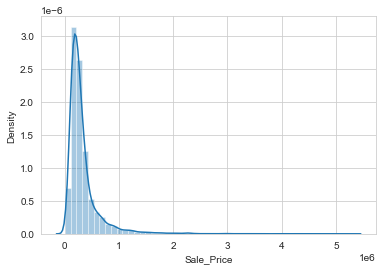

In [45]:
sns.distplot(df['Sale_Price'])

We can make a few observations about the `Sale_Price` histogram:
- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

In [46]:
#skewness and kurtosis
print("Skewness: %f" % df['Sale_Price'].skew())
print("Kurtosis: %f" % df['Sale_Price'].kurt())

Skewness: 4.930985
Kurtosis: 39.483102


Relationship with numerical variables

<AxesSubplot:xlabel='Building_Square_Feet', ylabel='Sale_Price'>

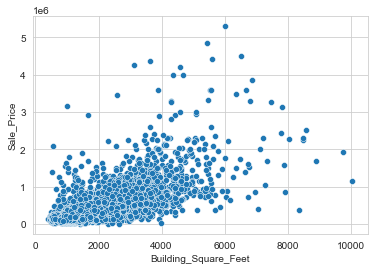

In [47]:
sns.scatterplot(df, x = 'Building_Square_Feet' , y = 'Sale_Price')

A positive correlation between `Sale_Price` and `Building_Square_Feet` is apparent from the scatterplot and intuitively also makes sense.

<AxesSubplot:xlabel='Land_Square_Feet', ylabel='Sale_Price'>

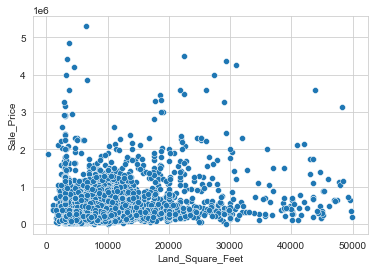

In [48]:
sns.scatterplot(df[df['Land_Square_Feet'] < 50000], x = 'Land_Square_Feet' , y = 'Sale_Price')

We can undoubtedly see a positive correlation with `Land_Square_Feet`. However, the relationship is weaker compared to the `Building_Square_Feet`.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

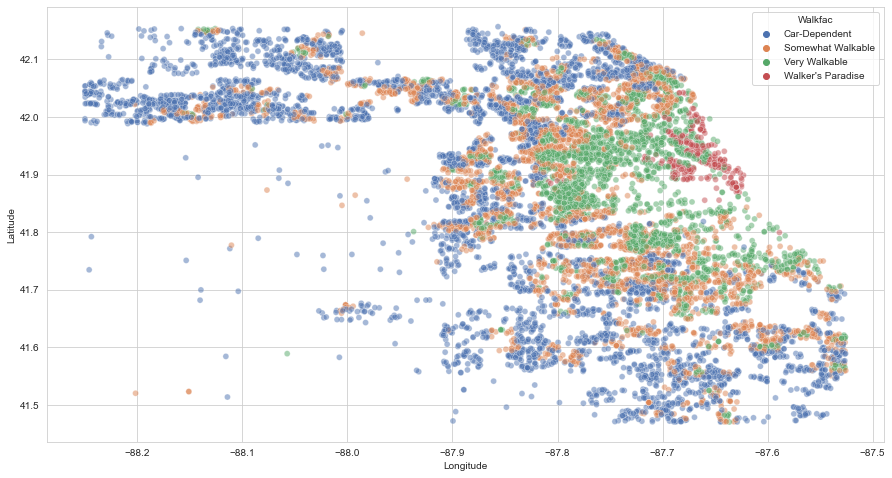

In [49]:
plt.figure(figsize= (15 , 8))
sns.scatterplot(df , x = 'Longitude' , y = 'Latitude' , alpha = 0.5 , hue = 'Walkfac' , palette = 'deep')

In [50]:
df.groupby('Walkfac')['Sale_Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Walkfac,,,,,,,,
Car-Dependent,4597.0,345105.570807,319657.603294,5000.0,172000.0,257500.0,390000.0,4500000.0
Somewhat Walkable,3512.0,295462.849658,282949.046373,15500.0,158000.0,227450.0,325000.0,4375000.0
Very Walkable,2474.0,313239.328618,278175.617664,20000.0,172000.0,242000.0,343625.0,4200000.0
Walker's Paradise,306.0,739232.803922,769229.392654,19000.0,256250.0,508500.0,907500.0,5300000.0


`Walker's Paradise` homes are encoded in hot red and clustered about the city center of Chicago. Observing the descriptive statistics, we can see that the mean price is almost double compared to other categories.

Relationship with categorical values

<AxesSubplot:xlabel='Property_Class', ylabel='Sale_Price'>

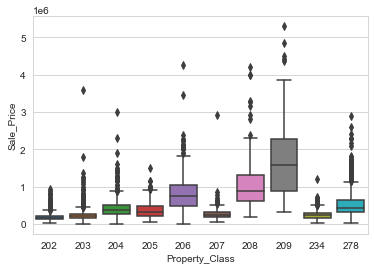

In [51]:
sns.boxplot(df , x = 'Property_Class' , y = 'Sale_Price')

The `Property_Class` 209 has a significantly higher average price than other classes, while 278 has a lot of outliers.

<AxesSubplot:xlabel='Tax_Year', ylabel='Count'>

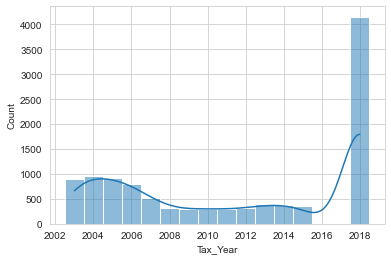

In [52]:
sns.histplot(df , x = 'Tax_Year', bins = 5 , kde = True)

The `Tax_Year` is not uniformly or normally distributed, and there is a peak in 2018 while specific years are not in the dataset (e.g., 2017).

Scatter plots between 'Sale_Price' and correlated variables

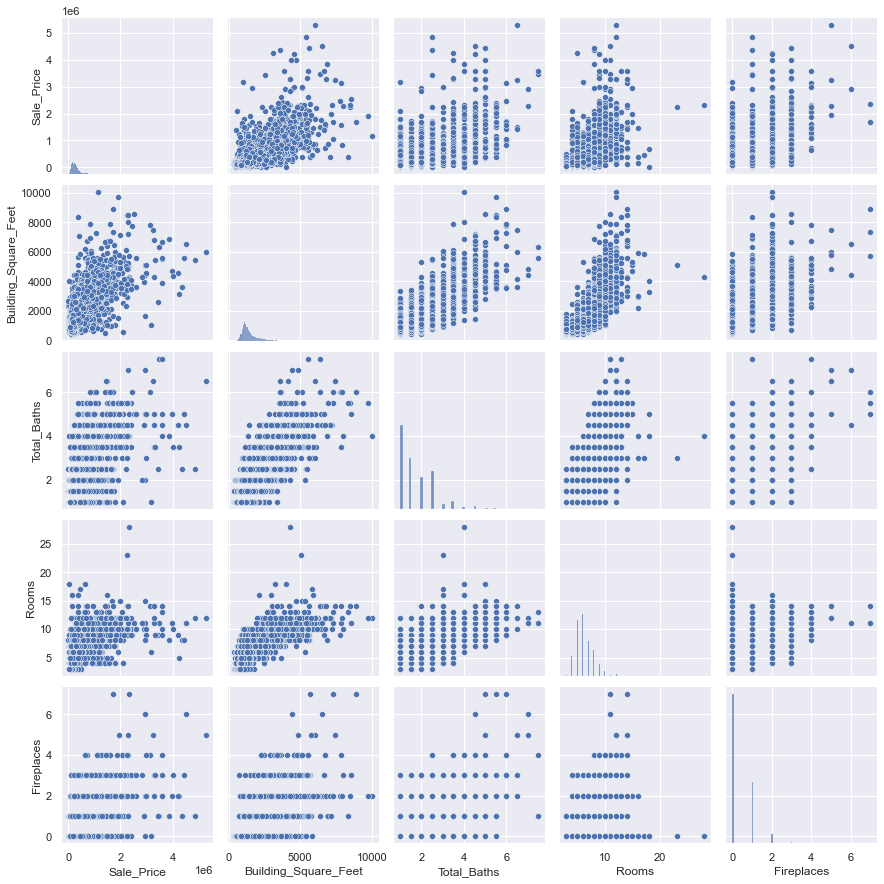

In [53]:
sns.set()
cols = ['Sale_Price', 'Building_Square_Feet', 'Total_Baths', 'Rooms', 'Fireplaces']
sns.pairplot(df[cols] , size = 2.5)
plt.show()

We can focus on the first row of data, relationships with the `Sale_Price`. All charts show a strong positive correlation with the `Sale_Price`. Intuitively, `Building_Square_Feet`/`Total_Baths`/`Rooms`/`Fireplaces` are bringing the `Sale_Price` up.

## Correlation Analysis and Hypothesis Testing
Correlation Analysis and Hypothesis Testing - 10 points: please focus on the relationship between the dependent variable and the predictors. Please include a correlation matrix (Pearson, Spearman, or Kendall) and at least 2 unique types of statistical tests (t-test, two-sample t-test, ANOVA, normal distribution tests, etc.). Please include interpretations of the results for each.

Correlation matrix

<AxesSubplot:>

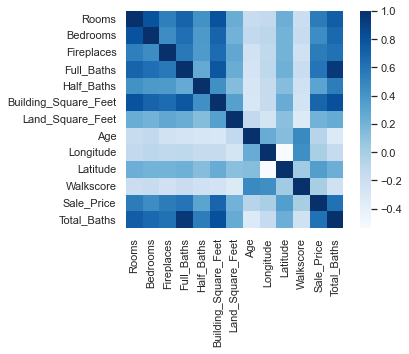

In [54]:
corr = df.corr() ## pearson correlation
sns.heatmap(df.corr() , cmap = 'Blues' , square = True)

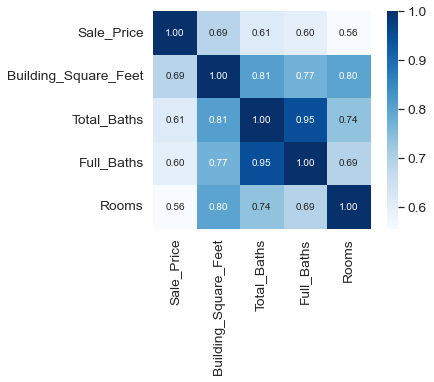

In [55]:
k = 5
cols = corr.nlargest(k , 'Sale_Price')['Sale_Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values , cmap = 'Blues')
plt.show()

Focusing on the top five correlated values with the `Sale_Price`, my thoughts are:
- `Building_Square_Feet` will be the first candidate for a linear regression due to a strong correlation
- `Total_Baths` and `Full_Baths` are the almost perfect matches and correlation is not far from `Building_Square_Feet.`

We are using the default argument for correlation, Pearson correlation.

Hypothesis Testing

`t-test:Building Square Feet vs Sale_Price`

Due to the relatively big sample of data, the t-test and z-test would lead to similar results. Even though we have a sample of the data, for simplicity, using the t-test.

In [56]:
ttest , p_value = scipy.stats.ttest_ind(df['Building_Square_Feet'] , df['Sale_Price'])
print("t_test value:%.2f" % ttest)
print("p value:%.2f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t_test value:-105.03
p value:0.00
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0000
Reject null hypothesis


The basic idea with the t-test is that we have the mean of one group, and we have the mean of another group (either of another sample or of the population), and we want to compare them. Per correlation matrix/analysis and now t-test, `Building_Square_Feet` is a strong candidate for the linear regression model. In this case, the test returns an extremely high t score with an extremely low corresponding p-value--evidence that the difference between means are indeed statistically signifciant.

`t-test:Total Baths vs Sale_Price`

In [57]:
ttest , p_value = scipy.stats.ttest_ind(df['Total_Baths'] , df['Sale_Price'])
print("t_test value:%.2f" % ttest)
print("p value:%.2f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t_test value:-105.55
p value:0.00
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0000
Reject null hypothesis


`Normality - Sale_Price`

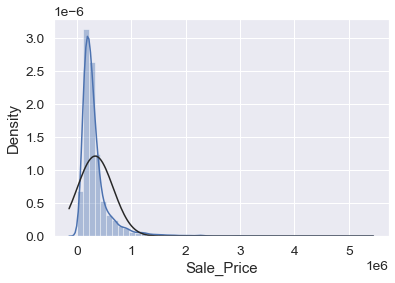

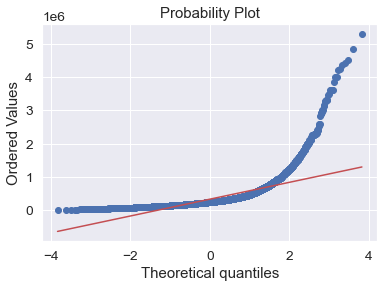

In [58]:
sns.distplot(df['Sale_Price'] , fit = norm)
fig = plt.figure()
res = stats.probplot(df['Sale_Price'] , plot = plt)

 `SalePrice` is not normally distributed; it shows 'peakedness' and positive skewness and does not follow the diagonal line. Nevertheless, everything is not lost, and a simple data transformation can solve the problem. In the case of positive skewness, log transformations usually work well.

In [59]:
df['Sale_Price_Log'] = np.log(df['Sale_Price'])

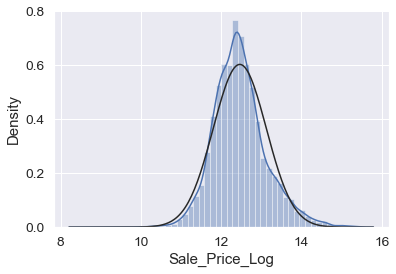

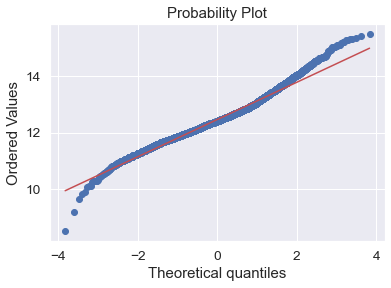

In [60]:
sns.distplot(df['Sale_Price_Log'] , fit = norm)
fig = plt.figure()
res = stats.probplot(df['Sale_Price_Log'] , plot = plt)

`Normality - Building_Square_Feet`

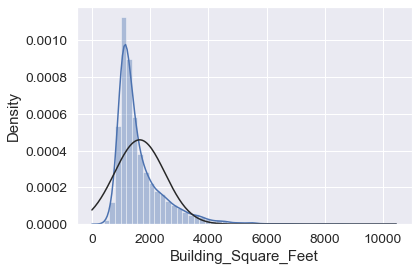

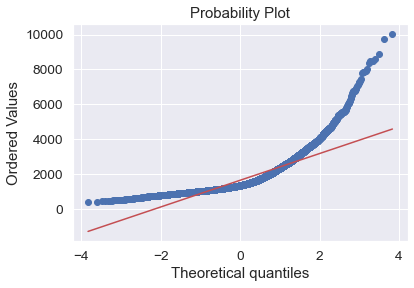

In [61]:
sns.distplot(df['Building_Square_Feet'] , fit = norm)
fig = plt.figure()
res = stats.probplot(df['Building_Square_Feet'] , plot = plt)

Skewness, apply log.

In [62]:
df['Building_Square_Feet_Log'] = np.log(df['Building_Square_Feet'] + 1)

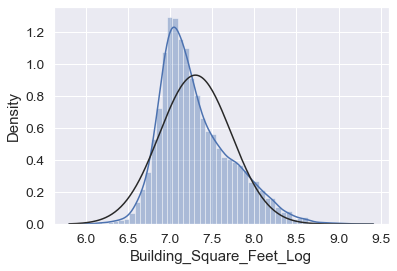

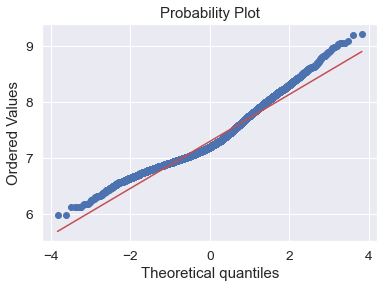

In [63]:
sns.distplot(df['Building_Square_Feet_Log'] , fit = norm)
fig = plt.figure()
res = stats.probplot(df['Building_Square_Feet_Log'] , plot = plt)

`Normality - Land Square Feet`

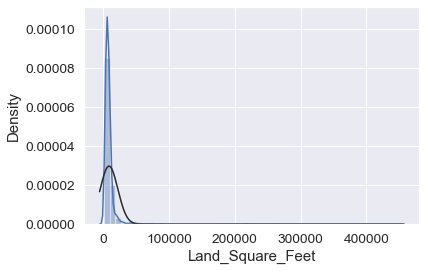

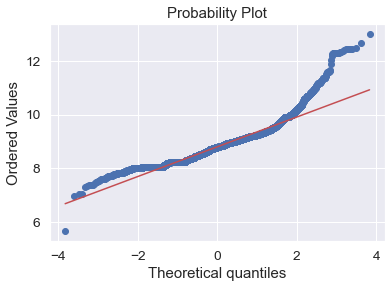

In [64]:
sns.distplot(df['Land_Square_Feet'] , fit = norm)
fig = plt.figure()
res = stats.probplot(np.log(df['Land_Square_Feet']) , plot = plt)

Distribution is positively skewed. However, log transformation will help here up to a certain level, but we will end up with a bi-modal distribution.

In [65]:
df['Land_Square_Feet_Log'] = np.log(df['Land_Square_Feet'] + 1)

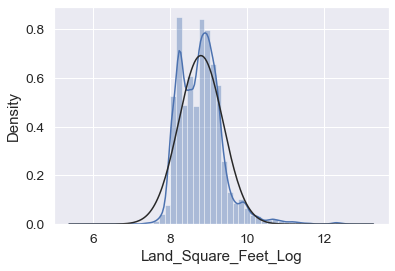

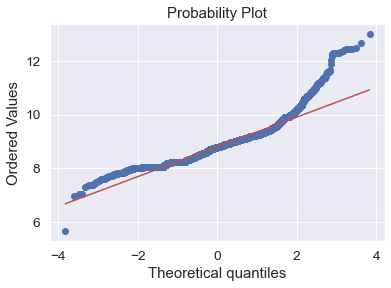

In [66]:
sns.distplot(df['Land_Square_Feet_Log'] , fit = norm)
fig = plt.figure()
res = stats.probplot(df['Land_Square_Feet_Log'] , plot = plt)

<AxesSubplot:xlabel='Building_Square_Feet_Log', ylabel='Sale_Price_Log'>

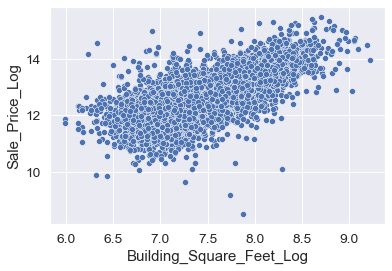

In [67]:
sns.scatterplot(df, x = 'Building_Square_Feet_Log' , y = 'Sale_Price_Log')

<AxesSubplot:xlabel='Land_Square_Feet_Log', ylabel='Sale_Price_Log'>

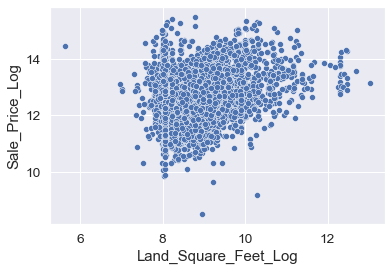

In [68]:
sns.scatterplot(df, x = 'Land_Square_Feet_Log' , y = 'Sale_Price_Log')

The best approach to test homoscedasticity for two metric variables is graphic. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution). The current scatter plot does not have a conic shape anymore.

`ANOVA - Property_Class`

In [69]:
test_var = 'Property_Class'
f_statistic , p_value = scipy.stats.f_oneway( *[df[df['Property_Class'] == _]['Sale_Price_Log']
                       for _ in df['Property_Class'].unique()]
                      )

print("F statistic value:%.2f" % f_statistic)
print("p value:%.2f" % p_value)

if p_value <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

F statistic value:923.90
p value:0.00
Reject null hypothesis >> The variances of the samples are different.


In [70]:
test_var = 'Type_of_Residence'
f_statistic , p_value = scipy.stats.f_oneway( *[df[df[test_var] == _]['Sale_Price_Log']
                                                for _ in df[test_var].unique()]
                                              )

print("F statistic value:%.2f" % f_statistic)
print("p value:%.2f" % p_value)

if p_value <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

F statistic value:774.96
p value:0.00
Reject null hypothesis >> The variances of the samples are different.


ANOVA (Analysis of Variance) compares the means of multiple samples, usually three or more, to test whether there is a difference in the means of their populations. It does this by considering the variation between groups and within each group (hence the name analysis of variance).

The f-statistic calculated is exceptionally high, with a correspondingly extremely low p-value. If we are trying to understand or predict property prices, `Property_Class` and `Type_of_Residence` may be a feature worth considering.

## Feature Selection, Engineering, and Preprocessing
Feature Selection, Engineering, and Preprocessing - 10 points: exclude existing features and create new features. Transform the data to numerical and prepare it for subsequent regression analyses. Change the unit of the feature, apply nonlinear transformations (take natural logarithms), and standardize the feature if you see fit.

In the previous section of the report, we have already transformed variables.
- applied non-linear transformation (e.g., `Sale_Price` , `Building_Square_Feet`)
- dropped data (e.g., `Property_Address` , `Census_Tract`)

`Ratios`

In [71]:
df['Bedroom_Ratio'] = df['Bedrooms'] / df['Rooms']
df['Bathroom_Ratio'] = df['Total_Baths'] / df['Bedrooms']
df['Sqft_per_Room'] = df['Building_Square_Feet'] / df['Rooms']
df['Building_to_Land_Ratio'] = df['Building_Square_Feet'] / df['Land_Square_Feet']

`Linear Variables`

In [72]:
df['Total_Area'] = df['Building_Square_Feet'] + df['Land_Square_Feet']
df['Quality'] = df['Rooms'] + df['Bedrooms'] + df['Fireplaces'] + df['Total_Baths'] + 10 / df['Age'] + df['Walkscore'] / 10

The quality feature should represent the quality and exclusivity of the home. Homes with more `Rooms` / `Baths` and newly built ones will have a higher quality score.

`Drop columns`

In [73]:
to_drop = ['PIN' , 'Building_Square_Feet' , 'Land_Square_Feet' , 'Sale_Price' , 'Area_Code' , 'Sub_Area_Code' , 'Block']
df.drop(labels = to_drop , axis = 1,  inplace = True)

`Correlation again`

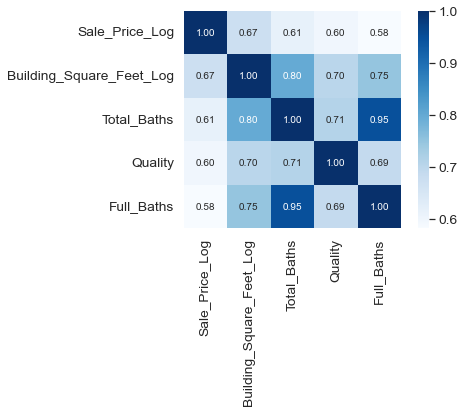

In [74]:
corr = df.corr()
k = 5
cols = corr.nlargest(k , 'Sale_Price_Log')['Sale_Price_Log'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values , cmap = 'Blues')
plt.show()

`Dummy variables`

In [75]:
dummies = pd.get_dummies(df[ df.columns[df.dtypes == 'category']], drop_first = True)

In [76]:
df = pd.get_dummies(df , drop_first = True)

## Modeling and Optimization
Modeling and Optimization - 20 points: build linear regression models (single or multiple) and try to optimize and find the one with the highest (adjusted) $R^2$. Print the summary of your "best" model and interpret the coefficients. Please at least interpret the coefficient of one continuous variable (all else accounted for, a one-unit (or standard deviation) increase in $x_j$ is associated with a $\hat{\beta_j}$ increase in $y$, on average) and one dummy variable (all else accounted for, $y$ for observations in category $a$ is $\hat{\beta_j} $ higher/lower as opposed to the observations in the reference level $b$, on average - must name $a$ and $b$ explicitly) and include their statistical significance at a level of 0.05.

`Sale_Price_Log = Bulding_Square_Feet_Log + C`

Model1 is log-log model where the independent variable is `Building_Square_Feet_Log`

In [77]:
model1 = sm.OLS(df['Sale_Price_Log'], sm.add_constant(df['Building_Square_Feet_Log'])) #Give the names of the columns to be fitted, and the entire dataframe
results1 = model1.fit() #The model then needs to be fitted
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:         Sale_Price_Log   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     9053.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:41:10   Log-Likelihood:                -7666.0
No. Observations:               10889   AIC:                         1.534e+04
Df Residuals:                   10887   BIC:                         1.535e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In instances where both the dependent and independent variable(s) are log-transformed variables, the interpretation is given as an expected percentage change in Y when X increases by some percentage. Such relationships, where both Y and X are log-transformed, are commonly referred to as elastic in econometrics, and the coefficient of log X is referred to as elasticity. So in terms of effects of changes in X on Y (both unlogged):
- multiplying X by e will multiply the expected value of Y by $e^β$
- To get the proportional change in Y associated with a p percent increase in X, calculate $a = log([100 + p]/100)$ and take $e^aβ$

There are two intuitive ways of interpreting the coefficient of 1.0429 on the `Building_Square_Feet_Log` variable.

- Multiplicative changes in both X and Y: Multiplying `Building_Square_Feet_Log` by $e \approx 2.73$ multiplies `Sale_Price_Log` by $e ^{1.0429}$, i.e. increased the expected Sale_Price by about 183%
- A 1% increase in X: A 1% increase in `Building_Square_Feet_Log` multiplies `Sale_Price_Log` by $e^{(1.0429)*ln(1.01)} = 1.01$. So a 1% increase in `Building_Square_Feet_Log` increase the `Sale_Price_Log` by 1.04%


$R^2$ of the model is 0.454 and regression coefficients are significant at the 0.05 level.

<AxesSubplot:xlabel='Building_Square_Feet_Log', ylabel='Sale_Price_Log'>

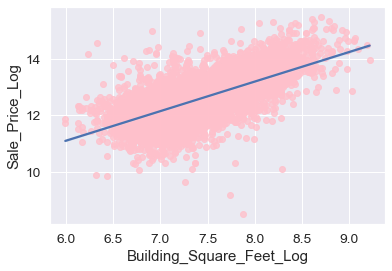

In [78]:
sns.regplot(x = 'Building_Square_Feet_Log', y = 'Sale_Price_Log' , data = df , scatter_kws= {'color' : 'pink'})

`Sale_Price_Log = Quality + C`

Model2 is log-linear model where the independent variable is `Quality`

In [79]:
model2 = sm.OLS(df['Sale_Price_Log'], sm.add_constant(df['Quality'])) #Give the names of the columns to be fitted, and the entire dataframe
results2 = model2.fit() #The model then needs to be fitted
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:         Sale_Price_Log   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     6017.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:41:11   Log-Likelihood:                -8565.2
No. Observations:               10889   AIC:                         1.713e+04
Df Residuals:                   10887   BIC:                         1.715e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7690      0.022    480.407      0.0

Each one unit increase of `Quality` increases the `Sale_Price_Log` by a multiple of $e^{0.0975} = 1.1024$ - or a 10.24% increase.

$R^2$ of the model is 0.356 and regression coefficients are significant at the 0.05 level. However, model is not performing as good as the previous model.

<AxesSubplot:xlabel='Quality', ylabel='Sale_Price_Log'>

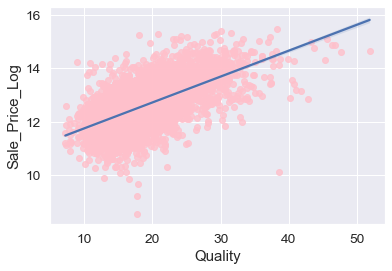

In [80]:
sns.regplot(x = 'Quality', y = 'Sale_Price_Log' , data = df , scatter_kws= {'color' : 'pink'})

`Sale_Price_Log = Dummy + C`

Model3 is log-linear multivariate model where the independent variables are all dummy variables created throughout the feature engineering process.

In [81]:
model3 = sm.OLS(df['Sale_Price_Log'], sm.add_constant(df[dummies.columns])) #Give the names of the columns to be fitted, and the entire dataframe
results3 = model3.fit() #The model then needs to be fitted
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:         Sale_Price_Log   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     346.5
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:41:11   Log-Likelihood:                -7043.7
No. Observations:               10889   AIC:                         1.416e+04
Df Residuals:                   10855   BIC:                         1.440e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

`Sale_Price_Log = DATASET + C`

Model4 is log-linear multivariate model where the independent variables are all variables from the dataset.

In [82]:
model4 = sm.OLS(df['Sale_Price_Log'], sm.add_constant(df[[_ for _ in df.columns if _ != 'Sale_Price_Log']])) #Give the names of the columns to be fitted, and the entire dataframe
results4 = model4.fit() #The model then needs to be fitted
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:         Sale_Price_Log   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     477.4
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:41:12   Log-Likelihood:                -4623.9
No. Observations:               10889   AIC:                             9350.
Df Residuals:                   10838   BIC:                             9722.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

$R^2$ of the model is 0.688, which is the best-performing model. Interpreting results would be similar to model2, and we can only access the impact of each value on the total output. The best performance does not come as a surprise because the model takes every feature into account and has the richest data set compared to the other models. Inspecting the coefficients and the significance level, we can see that only some coefficients are significant at the 0.05 level. Potential improvements could be to select n "best" features and ignore the rest.

## Model Diagnostics - optional
Model Diagnostics - optional, 10 points extra: test the assumptions made by your "best model". Refer to external resources to learn how.


The regression technique comes in many forms — linear, nonlinear, Poisson, and tree-based- but the core idea remains almost the same across the board. It can be applied to various predictive analytics problems in finance, healthcare, the service industry, manufacturing, agriculture, etc.

However, the success of a linear regression model also depends on some fundamental assumptions about the nature of the underlying data that it tries to model.

eval_env: 1


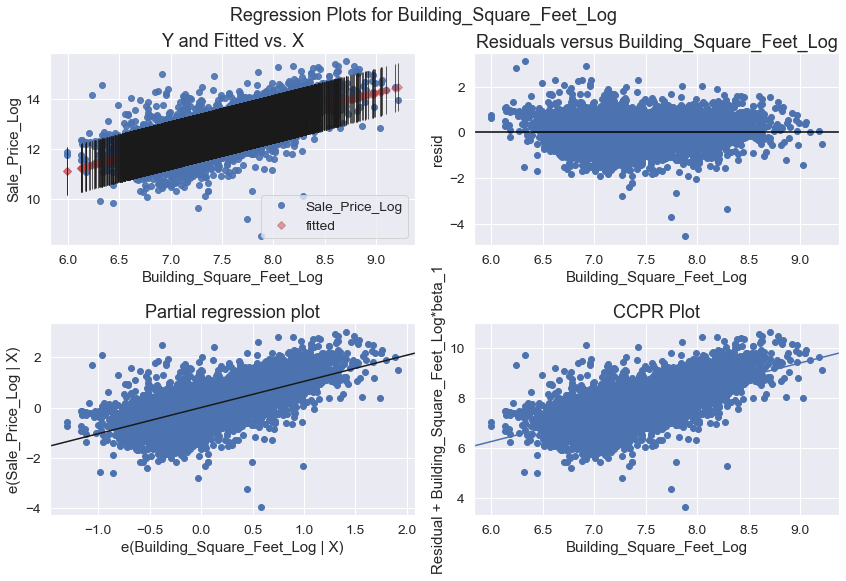

In [83]:
fig = plt.figure(figsize= (12 , 8))
fig = sm.graphics.plot_regress_exog(results1 , 'Building_Square_Feet_Log' , fig = fig)

First and foremost, the summary of the model is fitted through statsmodels.OLS method already provides rich statistical information about the model, such as t-statistics and p-values corresponding to all the predicting variables, R-squared, adjusted R-squared, AIC and BIC, etc.

**Residuals vs. predicting variables plots (top right chart)**
Next, we can plot the residuals versus each of the predicting variables to look for an independence assumption. If the residuals are distributed uniformly randomly around the zero x-axes and do not form specific clusters, then the assumption of heteroscedasticity hold true. The residuals appear to be randomly scattered around zero, which is an indication that heteroscedasticity is not a problem with either predictor variable in the model

## Conclusion
Conclusion - 10 points: list the conclusions, discuss the caveats, and list potential improvements.

Using the linear regression techniques presents itself as a powerful tool in house price predictions. With the basic statistical techniques learned so far, we can find a model that can reasonably accurately predict house prices. The most accurate bivariate models were using Building_Square_Feet_Log and Quality.

**Caveats**
Categorical variables: Some of our categorical features in the data have a high cardinality. We can improve model performance by recategorizing these high-dimensional features into lower dimensions.

**Potential Improvements**
Feature selection: One of the places where we can improve our model is to focus on the features that are contributing. Some features are closely correlated, and including both in the model is potentially causing overfitting.
Hyperparameter tuning: We can look to widen our solutions space for our hyperparameters in the hope of finding a more optimal position.
External data: creating and exploring more features could significantly improve our model. The new data sources we could use could be from distance to train stations to the macroeconomic situation in the world.